# EDA dla zbioru z problemem klasyfikacji płci w zależności od własności akustycznych głosu #

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats
import sklearn
from sklearn.decomposition import PCA

In [14]:
#df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")
#df = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\gender_voice_dataset.csv")

In [3]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Wszystkie nasze zmienne objaśniające są numeryczne, w dodatku w żadnej z nich nie mamy braków danych, co niewątpliwie ułatwi nam pracę. Cech jest aż 20. Dane pochodzą z analizy częstotliwości dźwięku generowanego przez głosy kobiet i mężczyzn. Zbiór obfituje w 3168 obserwacji.

In [5]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

Pierwszym ważnym spostrzeżeniem jest to, że dla każdej zmiennej mamy dokładnie wszystkie wartości różne, co oznacza brak zmiennych dyskretnych, przypuszczamy, że każda z nich będzie miała pewien rozkład ciągły. Większość tych zmiennych jest statystykami wygenerowanymi na podstawie nagrań głosów poszczególnych osób, stąd musimy uważać na (niekoniecznie unikać)  tworzenie statystyk z innych statystyk, takich jak średnia ze średnich. Może to prowadzić do nieścisłości, gdyż nie mamy dostępu do początkowych próbek. Zmienne mają w większości dość małe zakresy, mieszczą się między 0 a 1. Jedynie zmienna **kurt** przyjmuje istotnie większe wartości, spróbujemy znaleźć tutaj jakieś przekształcenie tej zmiennej. Duże wartości maksymalne mają również zmienne **skew**, **maxdom** i **dfrange**, tutaj możemy mieć do czynienia z obserwacjami odstającymi, stąd zwrócimy uwagę na te zmienne. Reszta zmiennych na pierwszy rzut oka nie zdradza nic podejrzanego, wartości kwartyli oraz zakresy wydają się w porządku.

In [6]:
np.max(abs(df.Q75-df.Q25-df.IQR))

1.0000000549847954e-09

**IQR**=**Q75**-**Q25**, zatem powinniśmy pozbyć się tej zmiennej, bo da się ją wyliczyć z pozostałych.

In [15]:
df = df.drop(columns="IQR")

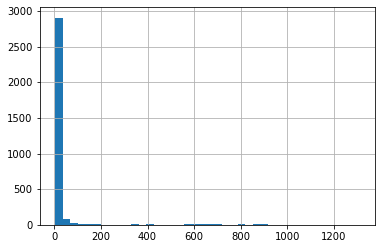

In [8]:
df['kurt'].hist(bins=40)

Spróbujmy przekształcić tą zmienną przy użyciu funkcji log(x).

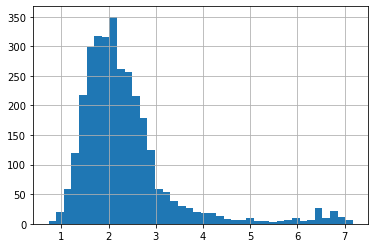

In [9]:
np.log(df['kurt']).hist(bins=40)

Przekształcenie to zadziałało całkiem nieźle, mamy już dużo mniejsze wartości. Dalej jednak mamy rozkład z bardzo dużym ogonem prawostronnym. Zobaczymy jak zadziała kolejne przekształcenie log(x). 

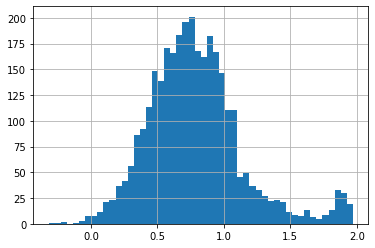

In [10]:
np.log(np.log(df['kurt'])).hist(bins=50)

Tak przekształcona zmienna **kurt** ma wartości bardzo podobne do innych zmiennych, a jej histogram przypomina bardzo gęstość rozkładu normalnego. Jedyną rzeczą, która to psuje jest dużo wartości większych od około 1.75. Moga to być wartości odstające, co zaraz sprawdzimy przy użyciu reguły trzech sigm.

In [16]:
df['kurt']=np.log(np.log(df['kurt']))

In [12]:
mean_kurt=np.mean(df['kurt'])
std_kurt=np.std(df['kurt'])
print("Liczba obserwacji odstających: ",np.sum(abs(df['kurt']-mean_kurt)>3*std_kurt))
print("Odsetek obserwacji odstających: ",np.sum(abs(df['kurt']-mean_kurt)>3*std_kurt)/len(df["kurt"]))

Liczba obserwacji odstających:  71
Odsetek obserwacji odstających:  0.02241161616161616


Mamy 71 obserwacji odstających, co wydaje się być ewentualną sporą utratą danych, jednak w porównaniu do całego zbioru jest to jedynie niecałe 2.5% obserwacji. 

<div class=text-justify>
Do tej pory udało nam się zidentyfikować zmienne, które potencjalnie przekazywały tą samą informację. W celu dalszej analizy występowania współliniowości posłużymy się narzędziem z analizy regresji, a mianowicie współczynnikiem podbicia wariancji (VIF). <br/>
W skrócie każdą ze zmiennych z naszej ramki eksperymentu będziemy w kolejnych krokach traktować jako zmienną objaśnianą i z pomocą metody najmniejszych kwadratów dokonywać rzutu tego wektora na podprzestrzeń stworzoną z pozostałych zmiennych w ramce danych. Dzięki statystyce $R^2$, mówiącej jaka część zmienności zmiennej objaśnianej w danej iteracji może być wytłumaczona zmiennością reszty zmiennych będziemy mogli skonstruować VIF. <br/>
Wartości powyżej 10 będą intuicyjnie świadczyły o występowaniu stochastycznej współliniowości. Wartości powyżej 100 będą świadczyły, że pozostałe zmienne w zbiorze w 99% tłumaczą zmienność danej cechy. Wartośc równa inf będzie świadczyła o tym, że zmienna jest kombinacją liniową pozostałych zmiennych. <br/>
Prosty wzór przedstawia się następująco : $$VIF_i = \frac{1}{1-R_i^2}$$. 
</div>

In [13]:
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = df.iloc[:, list(range(0,19))].columns 
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, list(range(0,19))].values, i) 
                          for i in range(len(df.iloc[:, list(range(0,19))].columns))] 
print(vif_data)

     feature           VIF
0   meanfreq  3.607208e+12
1         sd  2.378420e+02
2     median  4.407674e+02
3        Q25  2.092979e+02
4        Q75  1.596158e+03
5       skew  5.240596e+00
6       kurt  1.822943e+01
7     sp.ent  5.850425e+02
8        sfm  5.534098e+01
9       mode  1.440166e+01
10  centroid  5.829902e+12
11   meanfun  3.558988e+01
12    minfun  6.631470e+00
13    maxfun  1.190049e+02
14   meandom  1.308394e+01
15    mindom           inf
16    maxdom           inf
17   dfrange           inf
18   modindx  5.939156e+00


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Zmienne **mindom**, **maxdom**, **dfrange** są liniowo zależne z pewnym zestawem pozostałych zmiennych w zbiorze. Zmienne takie jak **centroid**, **meanfreq** wykazują pewną dozę współliniowości z pozostałymi zmiennymi, potencjalnie może, ale nie musi rodzić to potem problemy przy modelowaniu. 

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [15]:
corr = df.corr(method="spearman")
corr.style.background_gradient(cmap='coolwarm')

Jak widzimy bardzo duża liczba zmiennych jest ze sobą skorelowana. Będziemy się więc musieli poważnie zastanowić nad usunięciem kilku z nich. 
+ Pierwszą, która rzuca nam się w oczy jest zmienna **centroid**, która jest całkowicie skorelowana dodatnio ze zmienną **meanfreq**, co oznacza, że jest ona prawie na pewno jakąś funkcją liniową **meanfreq**. Dodatkowo ma ona korelację powyżej 0.9 z dwoma innymi zmiennymi, co sprawia, że jest ona idealnym kandydatem do usunięcia. 
+ Kolejną parą o prawie całkowitej dodatniej korelacji są zmienne **maxdom** i **dfrange**. Możemy zatem usunąć dowolną z nich.
+ Okazuje się, że po naszym przekształceniu zmiennej **kurt** jest ona bardzo silnie skorelowana ze **skew**, możemy zatem usunąć **skew**.
+ Zmienna **meanfreq** jest z kolei bardzo silnie skorelowana z **median** i **Q25**. Teoretycznie statystyki te nie muszą być w ogóle ze sobą powiązane, lecz w naszym przypadku bardzo możliwe jest, że **meanfreq** jest kombinacją liniową tych dwóch zmiennych i możemy usunąć ją z modelu.
+ **sfm** jest silnie najskorelowana z **sp.ent** oraz ma pozostałe korelacje dużo mocniejsze od **sp.ent**, zatem możemy się jej pozbyć z naszego zbioru. 
+ Niespodzianką jest silna korelacja ujemna występuje pomiędzy **sd** a **Q25**, jednak przy usunięciu **meanfreq** oraz **centroid** musimy zostawić w naszym zbiorze **Q25**, a możemy usunąć **sd**.

In [17]:
df=df.drop(columns=["centroid","dfrange","meanfreq","sfm","sd","skew"])

Przyjrzyjmy się dokładniej zmiennej **maxdom**.

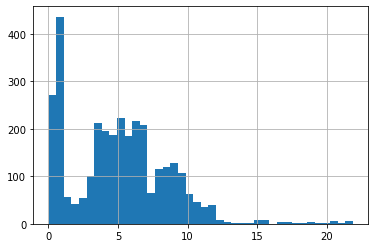

In [17]:
df['maxdom'].hist(bins=40)

Widzimy, że ma ona osobliwy histogram, wygląda na rozkład dwumodalny, prawostronnie skośny. Spróbujmy po raz kolejny zastosować na tej zmiennej przekształcenie logarytmiczne.

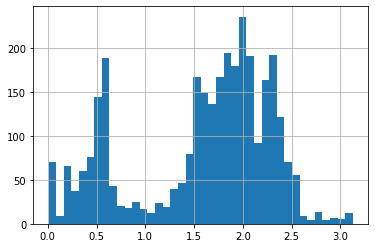

In [18]:
np.log(df['maxdom']+1).hist(bins=40)

Po przekształceniu dalej mamy rozkład dwumodalny, ale pozbyliśmy się prawostronnej skośności. Możemy jeszcze zobaczyć przy pomocy boxplotu jak rozkłada się ta zmienna.

In [18]:
df['maxdom']=np.log(df['maxdom']+1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


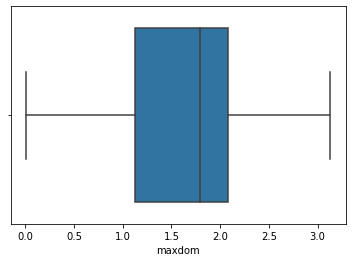

In [20]:
sns.boxplot(df['maxdom'])

Nie mamy zatem podejrzeń o obserwacjach odstających. Możemy zastanowić się nad binaryzacją tej zmiennej na 0 dla wartości mniejszych od 1 i 1 dla wartości większych od 1. Zobaczmy jakie byłyby teoretyczne proporcje obu klas.

In [21]:
print("Liczba obserwacji z klasy 0: ",np.sum(df['maxdom']<=1.1))
print("Liczba obserwacji z klasy 1: ",np.sum(df['maxdom']>1.1))

Liczba obserwacji z klasy 0:  787
Liczba obserwacji z klasy 1:  2381


Proporcje obserwacji w obu klasach wynosiłyby zatem 1:3, więc byłyby całkiem akceptowalne.

Na potrzeby przyszłych analiz zapewne przydałoby się utworzyć pomocniczą zmienną indykatorową, która 1 przypisywałaby obserwacji będącej kobietą, a 0 mężczyzną. 

In [19]:
df["gender"]=0
df.loc[list(np.where(df.label=="female")[0]),"gender"]=1

Powróćmy do współczynnika podbicia wariancji. Jak wyglada liniowa zależność w nowopowstałym zbiorze zmiennych?

In [23]:
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = df.iloc[:, list(range(0,13))].columns 
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, list(range(0,13))].values, i) 
                          for i in range(len(df.iloc[:, list(range(0,13))].columns))] 
print(vif_data)

    feature         VIF
0    median  138.308511
1       Q25   33.067469
2       Q75  242.938603
3      kurt    8.165990
4    sp.ent  181.891815
5      mode   14.195881
6   meanfun   34.052131
7    minfun    6.374808
8    maxfun  114.317181
9   meandom   12.544684
10   mindom    2.199329
11   maxdom   25.818661
12  modindx    5.454448


<div class=text-justify>
Usunęliśmy zmienne, kóre były deterministycznie kombinacją liniową pozostałych zmiennych. Spoglądając na zestawienie 12 cech nadal występuje współliniowość, na przykład patrząc na <b>median </b>, <b>Q75 </b>,  <b>maxfun </b>, <b>sp.ent</b>. Najprawdopodobniej, niektóre z nich niosą tę samą informację co pewne pozostałe zmienne ze zbioru lub ich kombinacje. Jeżeli nie chcemy się już pozbywać żadnej zmiennej powinniśmy pamiętać o tym fakcie analizując macierz kowariancji, może stosować pewne zabiegi regularyzujące przy regresji i ich odpowiedniki dla innych algorytmów.
</div>

Porównajmy teraz histogramy oraz wykresy zależności wszystkich zmiennych w grupach.

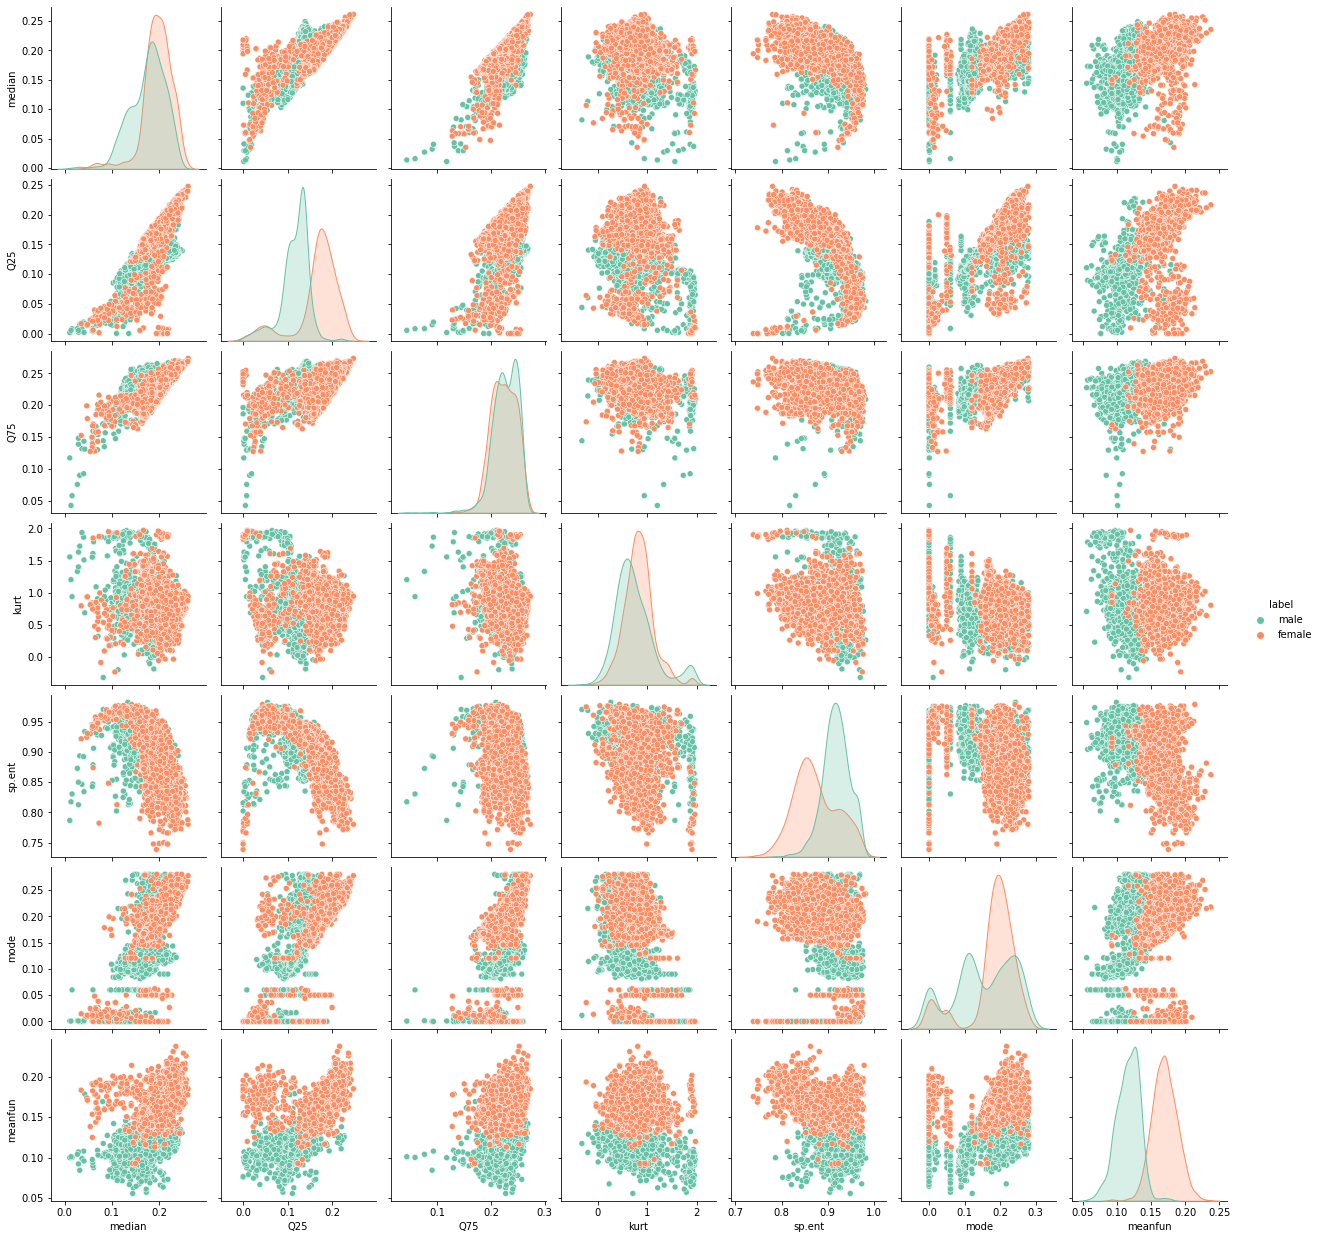

In [24]:
sns.pairplot(df,x_vars=list(df.columns[0:7]),y_vars=list(df.columns[0:7]), kind="scatter", hue="label", palette="Set2")
plt.show()

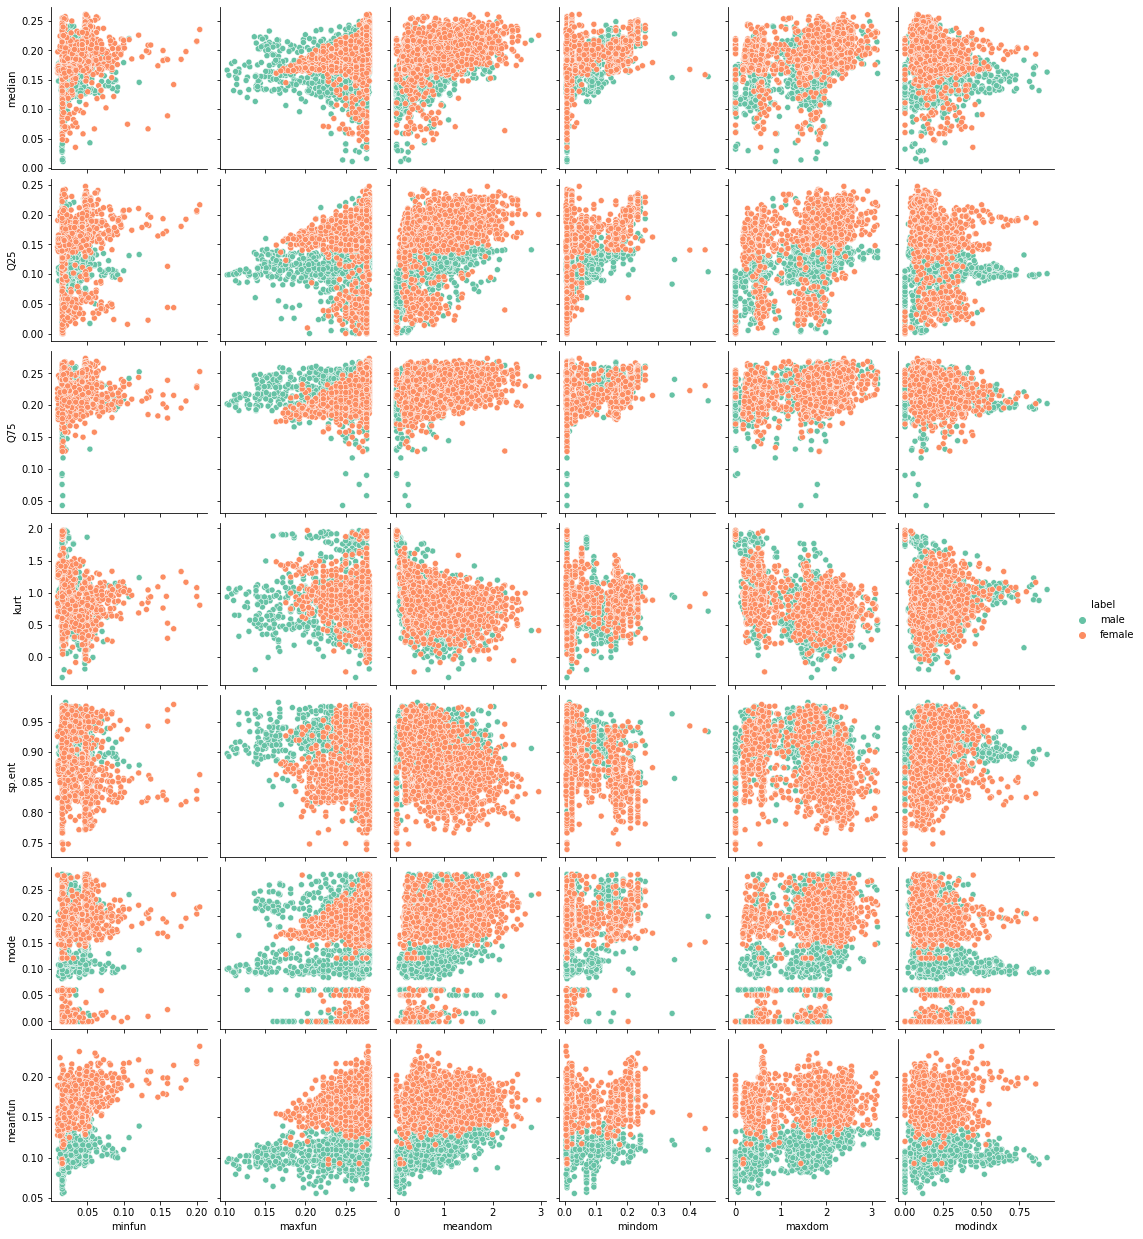

In [25]:
sns.pairplot(df,x_vars=list(df.columns[7:13]),y_vars=list(df.columns[0:7]), kind="scatter", hue="label", palette="Set2")
plt.show()

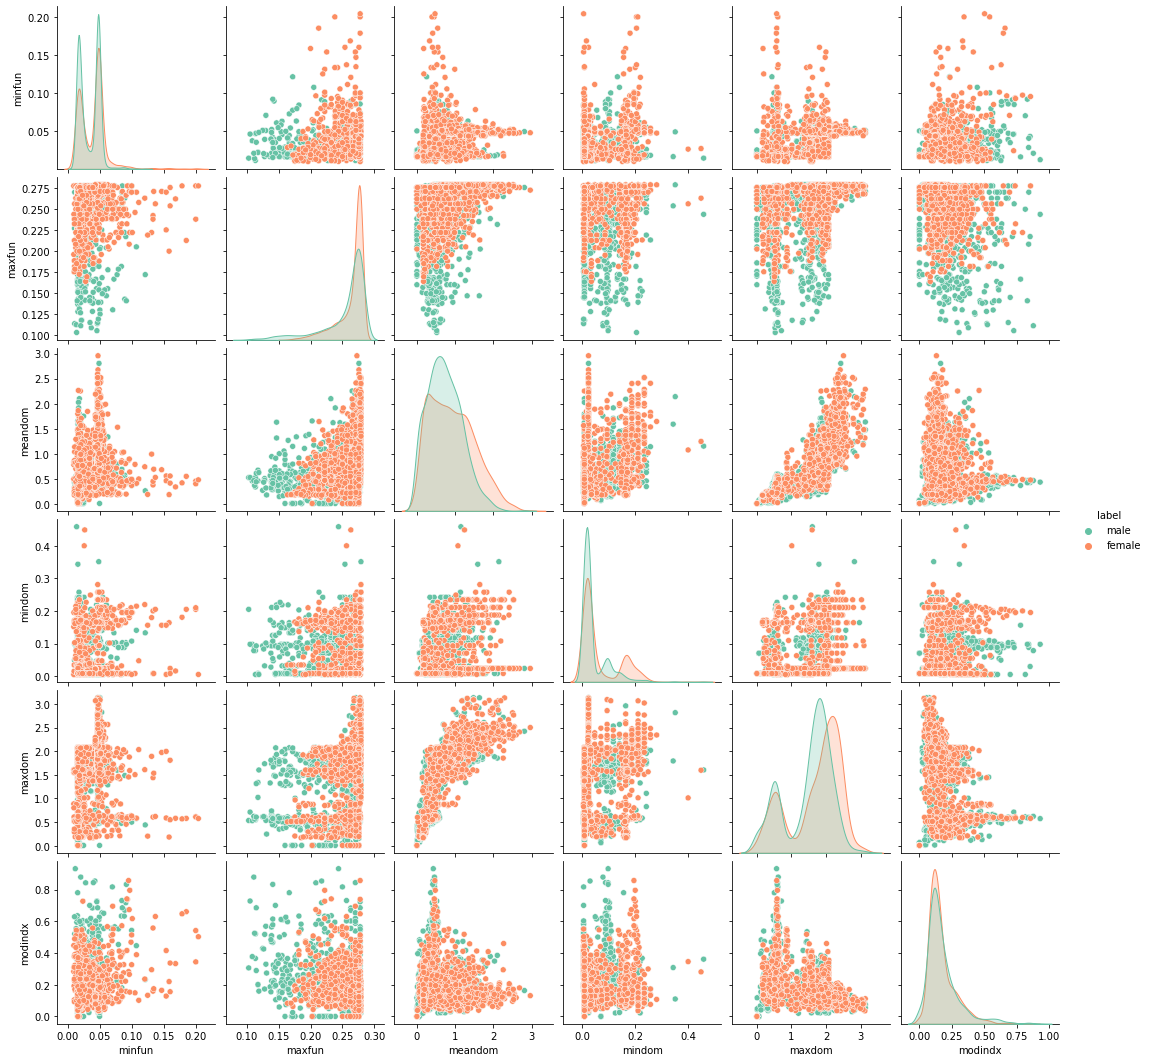

In [26]:
sns.pairplot(df,x_vars=list(df.columns[7:13]),y_vars=list(df.columns[7:13]), kind="scatter", hue="label", palette="Set2")
plt.show()

Wnioski jakie możemy wyciągnąć z wykresów:
+ Zmienne w większości przypadków nie przejawiają nawet nieliniowych zależności parami od siebie. Jedynymi parami podejrzanymi o to są **Q25** i **median** oraz **maxdom** i **meandom**.
+ Dodatkowo niezależność ta jest również pod warunkiem znajomości płci danej osoby.
+ Niektóre zmienne wydają się bardzo dobrze separować obie klasy, więc będzie nam zależało, żeby uwzglednić je w naszym modelu jako pierwsze. Są to na przykład: **meanfun**, **Q25**, **mode** i **sp.ent**.
+ Histogramy wszystkich zmiennych poza **mode** mają podobne kształty w przypadku kobiet i mężczyzn. W przypadku tej zmiennej rozkład **mode** dla obu płci ma zupełnie różne maksima, kształty oraz punkty koło których gromadziło się najwięcej obserwacji.

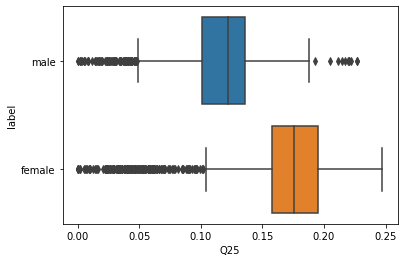

In [27]:
sns.boxplot(data=df,x="Q25",y="label")
plt.show()

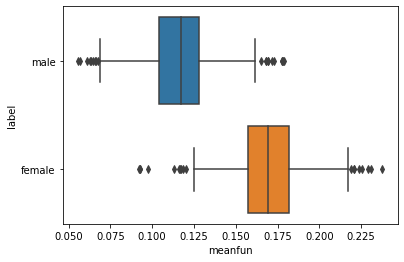

In [28]:
sns.boxplot(data=df,x="meanfun",y="label")
plt.show()

Histogramy warunkowane z przynależnością do płci pokazują ciekawą własność rozkładu zmiennej **mode**. Męskie głosy zdają się samotnie koncetrować wokół wartości 0.09. Możemy popatrzeć na przekształcenia tej zmiennej lub próby jej skategoryzowania.

In [20]:
df["mode_trans"] = np.abs(df["mode"] - 0.09)
df["mode_trans2"]=0
df.loc[list(np.where((df["mode"]>0.08) & (df["mode"]<0.15) )[0]),"mode_trans2"]=1
corr = df.loc[:,["mode","mode_trans2", "mode_trans", "gender"]].corr(method="kendall")
corr.style.background_gradient(cmap='coolwarm')

Zmienna indykatorowa która jako warunek bierze obserwacje podzielone ze względu na zmienną **mode** w zależności do zawierania się wartości w przedziale od 0.08 do 0.15, a poza nim zdaje się mieć dużą moc deskryminacyjną w porównaniu do zwykłej monotonicznej zależności **mode** i płci mierzonej korelacją kendalla.

# Data preprocessing and feature engineering

Usunęliśmy już wcześniej kilka zmiennych, które według nas nie wnosiłyby nic do modelu, dla przypomnienia powtórzymy poprzednie usunięcia i transformacje oraz sprawdzimy czy możemy jakoś stransformować pozostałe zmienne.

In [86]:
#df1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")
df1 = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\gender_voice_dataset.csv")

Zmienne dotychczas usunięte:

In [87]:
df1=df1.drop(columns=["IQR","centroid","dfrange","meanfreq","sfm","sd","skew"])

Dotychczasowe transformacje:

In [88]:
df1['kurt']=np.log(np.log(df1['kurt']))
df1['maxdom']=np.log(df1['maxdom']+1)

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   median   3168 non-null   float64
 1   Q25      3168 non-null   float64
 2   Q75      3168 non-null   float64
 3   kurt     3168 non-null   float64
 4   sp.ent   3168 non-null   float64
 5   mode     3168 non-null   float64
 6   meanfun  3168 non-null   float64
 7   minfun   3168 non-null   float64
 8   maxfun   3168 non-null   float64
 9   meandom  3168 non-null   float64
 10  mindom   3168 non-null   float64
 11  maxdom   3168 non-null   float64
 12  modindx  3168 non-null   float64
 13  label    3168 non-null   object 
dtypes: float64(13), object(1)
memory usage: 346.6+ KB


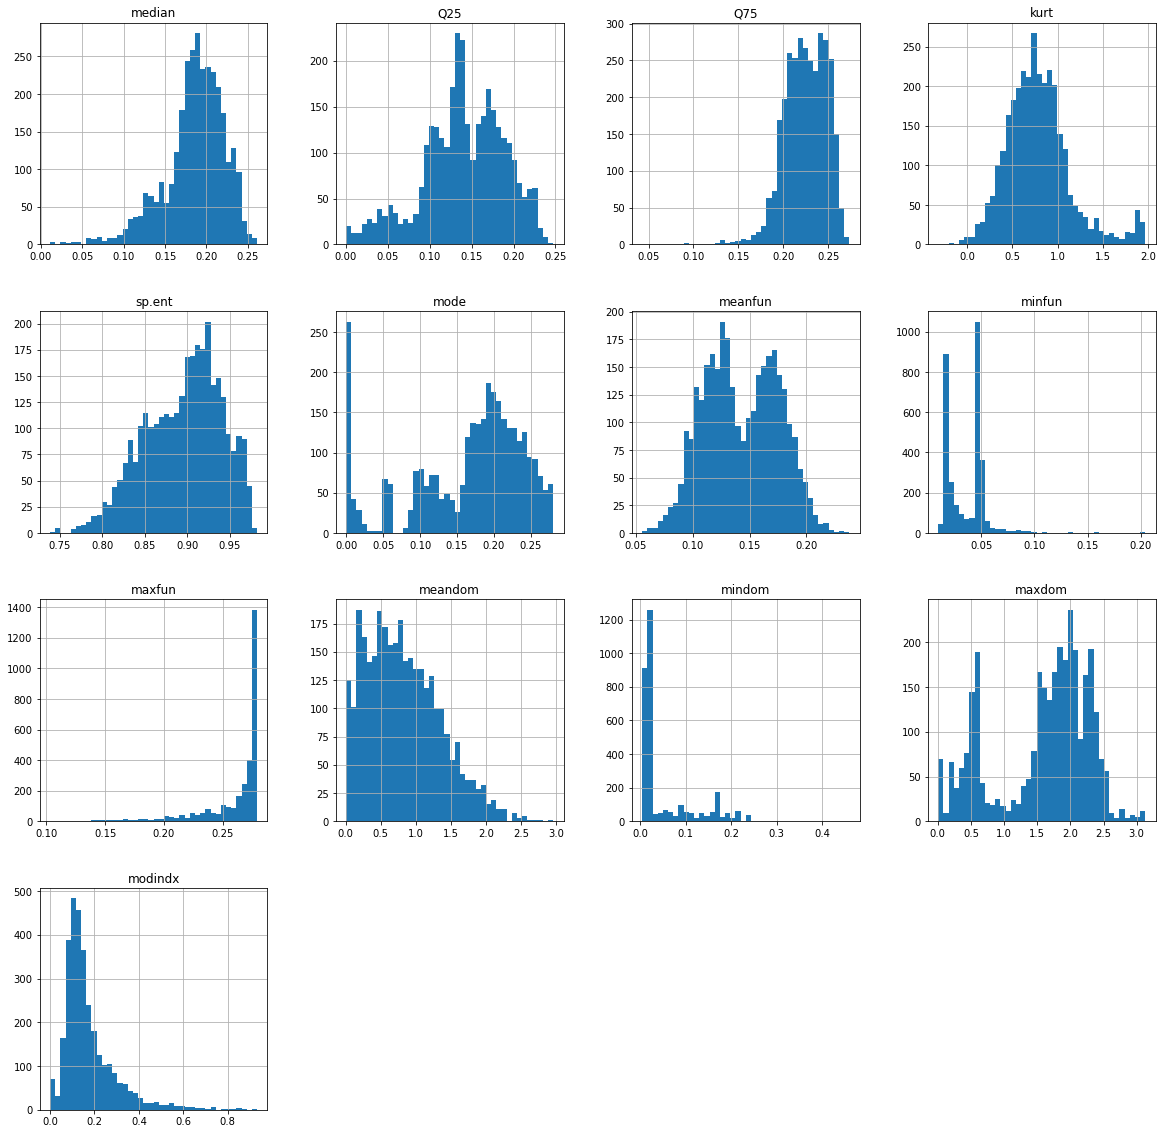

In [90]:
df1.hist(bins=40,figsize=(20,20))
plt.show()

Będziemy chcieli znaleźć jeszcze przekształcenia dla zmiennych **meandom** oraz **modindx**. 

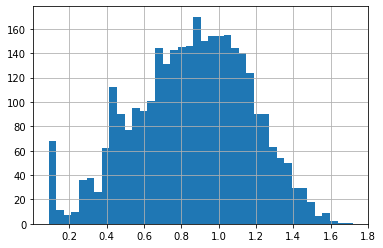

In [91]:
np.sqrt(df1["meandom"]).hist(bins=40)
plt.show()

In [92]:
df1["meandom"]=np.sqrt(df1["meandom"])

Okazuje się, że dobrym przekształceniem dla zmiennej **meandom** jest pierwiastek, wtedy rozkład ten staje się niemal symetryczny i przypomina nawet w pewnym sensie krzywą Gaussa. Martwi nas jedynie duży słupek w okolicach zera. Sprawdzimy czy nie jest to jedna wartość co wskazywałoby na to, że dane zostały w pewien sposób ucięte do tej wartości (np. była to minimalna czułość przyrządów pomiarowych).

In [93]:
df1["meandom"].value_counts()

0.088388    61
0.265165     4
0.847791     4
0.678924     4
0.441942     4
            ..
0.549239     1
0.969254     1
1.356673     1
1.021488     1
0.687500     1
Name: meandom, Length: 2999, dtype: int64

Dzieje się tak jak podejrzewaliśmy, jedna wartość powtarza się zbyt liczną ilość razy, uznamy ją zatem za wartość odstającą, gdyż może się okazać, że faktyczne wartości były dużo mniejsze niż wpisane. Dodatkowo widzimy, że odstaje ona bardzo dużo od rozkładu. Sprawdźmy tylko czy obserwacje te nie różnicują nam dobrze obu klas.

In [94]:
odstajace1 = np.where(df1["meandom"]==np.min(df1["meandom"]))
(df1["label"])[df1["meandom"]==np.min(df1["meandom"])].value_counts()

male      42
female    19
Name: label, dtype: int64

Taką różnicę w obu klasach jesteśmy jeszcze w stanie zaakceptować.

Przejdźmy teraz do zmiennej **modindx**. Okazuje się, że dobrym przekształceniem dla niej będzie log(x+1). Znowu jednak mamy wystający słupek histogramu przy zerze, musimy sprawdzić czy nie stało się tak jak w poprzednim przypadku, że jest tak tylko jedna wartość.

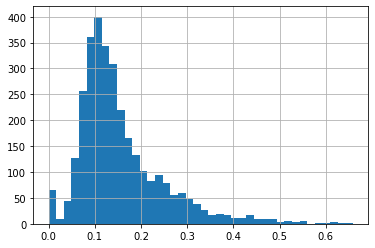

In [95]:
np.log(df1["modindx"]+1).hist(bins=40)
plt.show()

In [96]:
df1["modindx"].value_counts()

0.000000    65
0.133333     3
0.166667     3
0.200000     3
0.052632     3
            ..
0.087455     1
0.174607     1
0.288491     1
0.251960     1
0.380226     1
Name: modindx, Length: 3079, dtype: int64

Widzimy, że w tym przypadku najprowdobodobniej wartość zerowa ma zbyt dużą liczność, co może świadczyć o pewnym przycięciu pierwotnych obserwacji do 0, a co za tym idzie wpłynie to na poprawność naszego modelu. Obserwacje te będziemy, więc traktować jako odstające. Sprawdźmy jak poprzednio czy nie oddzielają nam one dobrze klas.

In [97]:
odstajace2 = np.where(df1["modindx"]==np.min(df1["modindx"]))
(df1["label"])[df1["modindx"]==np.min(df1["modindx"])].value_counts()

male      46
female    19
Name: label, dtype: int64

Nie jest to rażąca przewaga jednej z klas, więc możemy zaakceptować te obserwacje jako odstające.

W naszym zbiorze mamy sporo skośnych rozkładów, więc tam skrajne obserwacje wcale nie muszą być odstające, wynikają one raczej ze specyfiki rozkładów. Jedynymi pozostałymi zmiennymi gdzie możnaby zauważyć jakieś obserwacje odstające są zmienne **Q75** oraz **kurt**. **Q75** ma bardzo cienki ogon z lewej strony, za to brak go z prawej, dodatkowo jest to rozkład mocno skupiony na krótkim odcinku, stąd nasze podejrzenie. **kurt** ma z kolei bardzo dziwną "górkę" w histogramie z prawej strony, zupełnie nie pasuje ona do rozkładu. Sprawdźmy czy rozkłady te są w jakiś sposób normalne testem Shapiro-Wilka i czy możemy zastosować regułę 3 sigm.

In [98]:
scipy.stats.shapiro(df1["Q75"])

ShapiroResult(statistic=0.9543516635894775, pvalue=2.1591395600310518e-30)

In [63]:
scipy.stats.shapiro(df1["kurt"])

ShapiroResult(statistic=0.952728271484375, pvalue=7.620056553216739e-31)

Jak widać z p-wartości obu testów nie mamy żadnego prawa uznać je za normalne, posłużymy się jednak w pewien sposób nierównością Markowa. Z tego powodu wycentrujemy najpierw te zmienne.

In [99]:
E_Q75 = np.mean(df1["Q75"])
E_kurt = np.mean(df1["kurt"])
df1["Q75"]=df1["Q75"]-E_Q75
df1["kurt"]=df1["kurt"]-E_kurt

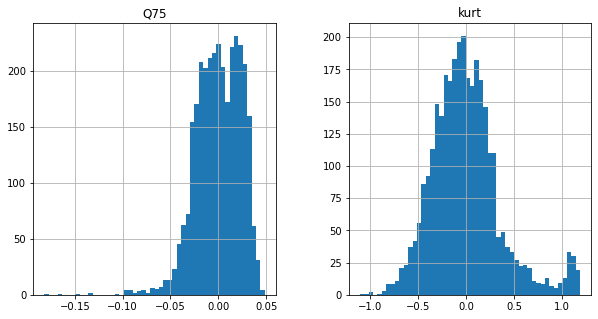

In [100]:
df1[["Q75","kurt"]].hist(bins=50,figsize=(10,5))
plt.show()

Chcemy sprawdzić czy odstające są obserwacje mniejsze od -0.07 dla **Q75** oraz większe od 1 dla **kurt**. Z nierówności Markowa wiemy, że $$\mathbb{P}(|X|>eps)\leq\frac{\mathbb{E}(X^2)}{eps^2}=\frac{Var(X)}{eps^2}=p_X$$

In [101]:
p_Q75 = np.var(df1["Q75"])/0.07**2
p_Q75

0.11400797631864766

In [102]:
p_kurt = np.var(df1["kurt"])/1
p_kurt

0.12885724864622636

Zatem tak się szacują prawdopodobieństwa, że wartości bezwzględne wychodzą poza te wartości. Nie są one może rzędu 0.05, należy jednak pamiętać, że jest to zazwyczaj dość grube oszacowanie i sporo zawyża faktyczną wartość prawdobodobieństwa. Na potwierdzenie nasze tezy możemy zobaczyć również boxploty dla obu zmiennych, które potwierdzą nam, że istnieją obserwcje odstające tam gdzie podejrzewaliśmy, a nawet są jeszcze bardziej rygorystyczne względem naszych wartości w przypadku **kurt**.

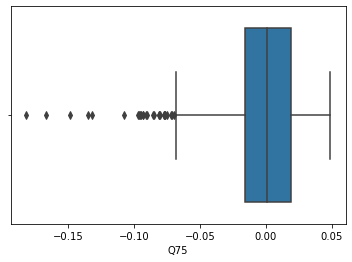

In [103]:
sns.boxplot(data=df1,x="Q75")
plt.show()

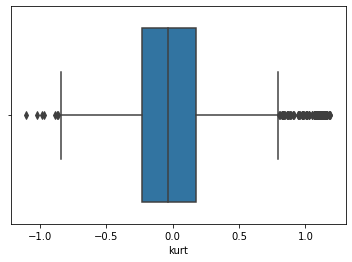

In [104]:
sns.boxplot(data=df1,x="kurt")
plt.show()

In [105]:
odstajace3 = np.where(np.abs(df1["Q75"])>0.07)
(df1["label"])[np.abs(df1["Q75"])>0.07].value_counts()

male      19
female     7
Name: label, dtype: int64

In [106]:
odstajace4 = np.where(np.abs(df1["kurt"])>1)
(df1["label"])[np.abs(df1["kurt"])>1].value_counts()

male      76
female    22
Name: label, dtype: int64

Sprawdźmy ile obserwacji łącznie uznaliśmy za odstające.

In [107]:
from functools import reduce
odstajace = reduce(np.union1d,(odstajace1[0],odstajace2[0],odstajace3[0],odstajace4[0]))

In [108]:
len(odstajace)

121

In [109]:
len(odstajace)/len(df1["label"])

0.03819444444444445

Mamy zatem zidentyfikowanych 121 obserwacji odstających, co stanowi niecałe 4% zbioru. Jest to jak najbardziej akceptowana liczba outlierów.

In [113]:
df1= df1.loc[np.setdiff1d(np.array(np.array(df1.index).tolist()),np.array(odstajace.tolist())),:]

W kolejnym zbiorze danych, które chcemy przygotować przygotujemy więcej zmiennych jakościowych poprzez grupowanie niektórych ze zmiennych ilościowych. Przyjrzyjmy się tym zmiennym, które najbardziej nas interesują. Jako bazy użyjemy ramki danych z usuniętymi kolumnami podczas EDA.

In [37]:
#df2 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")
#df2 = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\gender_voice_dataset.csv")
df2=df2.drop(columns=["IQR","centroid","dfrange","meanfreq","sfm","sd","skew"])
df2['kurt']=np.log(np.log(df2['kurt']))
df2['maxdom']=np.log(df2['maxdom']+1)

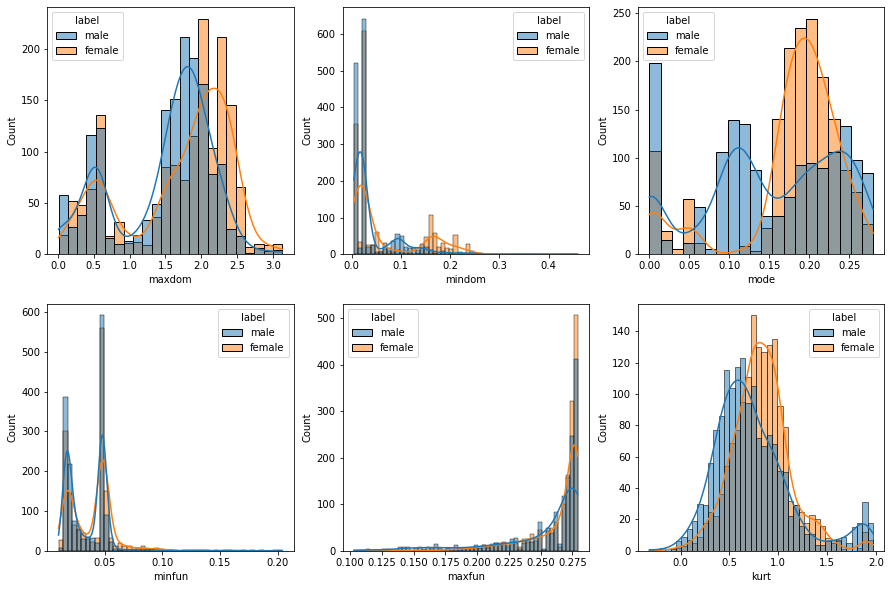

In [271]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data=df2, x="maxdom", kde=True,hue="label" , ax=axs[0, 0])
sns.histplot(data=df2, x="mindom", kde=True, hue="label", ax=axs[0, 1])
sns.histplot(data=df2, x="mode", kde=True, hue="label", ax=axs[0, 2])
sns.histplot(data=df2, x="minfun", kde=True, hue="label", ax=axs[1, 0])
sns.histplot(data=df2, x="maxfun", kde=True, hue="label", ax=axs[1,1])
sns.histplot(data=df2, x="kurt", kde=True, hue="label", ax=axs[1,2])

plt.show()

Zajmijmy się najpierw zmienną **minfun**. Możemy ją łatwo podzielić na dwie grupy, gdzie granicą między nimi będzie mniej więcej liczba 0.03.

In [38]:
df2["minfun_cat"]=0
df2.loc[df2["minfun"]>0.03,"minfun_cat"]=1

Podobnie można podzielić zmienną maxdom, tam również występują wyraźnie dwie górki, przy czym jedna z nich słabo rozdziela zmienna, za to druga wydaje się to robić bardzo dobrze. Granicą między nimi jest jedynka.

In [39]:
df2["maxdom_cat"]=0
df2.loc[df2["maxdom"]>1,"maxdom_cat"]=1

Przyjrzyjmy się teraz zmiennej **mindom**, która wykazuje silne tendencje dwumodalne.

In [280]:
df2["mindom"].value_counts()

0.023438    1246
0.007812     814
0.164062     109
0.054688      63
0.004883      61
            ... 
0.458984       1
0.219727       1
0.107666       1
0.027344       1
0.281250       1
Name: mindom, Length: 77, dtype: int64

Tak jak podejrzewaliśmy, dwie konkretne wartości wybijają się znacznie licznością ponad inne. Naszym pomysłem jest więc skategoryzowanie tej zmiennej na 3 klasy, 2 odpowiadające modom oraz 1 odpowiadającą pozostałym wartościom.

In [40]:
df2["mindom_cat"]=1
df2.loc[df2["mindom"]==df2["mindom"].value_counts().index[1],"mindom_cat"]=0
df2.loc[df2["mindom"]==df2["mindom"].value_counts().index[0],"mindom_cat"]=2

Wówczas proporcje tej zmiennej wynoszą:

In [41]:
df2["mindom_cat"].value_counts()

2    1246
1    1108
0     814
Name: mindom_cat, dtype: int64

Zmienną **mode** również będziemy chcieli przekształcić na 2 sposoby. Jest to motywowane tym, że wartości tej zmiennej dla kobiet i mężczyzn skupiają się w różnych punktach, jednak nie jest łatwo je rozdzielić na przykład na dwa rozłączne i spójne przedziały.

In [42]:
df2["mode_trans"] = np.abs(df2["mode"] - 0.09)
df2["mode_trans2"]=0
df2.loc[list(np.where((df2["mode"]>0.08) & (df2["mode"]<0.15) )[0]),"mode_trans2"]=1

Zmiennej **maxfun** nie chcemy jednak skategoryzować, ma ona osobliwy rozkład, mocno skośny, ale nie widać u niej jasnych przesłanek do kategoryzacji. Ostatnią zmienną, którą się zajmiemy będzie **kurt**, zastosujemy tu podobny schemat jak w przypadku **mode**.

In [43]:
df2["mode_kurt"] = np.abs(df2["kurt"] - 1.15)
df2["mode_kurt2"]=0
df2.loc[list(np.where((df2["kurt"]>0.7) & (df2["kurt"]<1.6) )[0]),"kurt_trans2"]=1

Pozostałe zmienne będziemy chcieli przeskalować minmaxem do przedziału (0,1)

In [44]:
mins=df2.iloc[:,0:13].apply(np.min,0)
maxs=df2.iloc[:,0:13].apply(np.max,0)

In [45]:
df2.iloc[:,0:13]=(df2.iloc[:,0:13]-mins)/(maxs-mins)

## Alternatywna analiza, miscallenous
### 1. DBSCAN
### 2. PCA
### 3. Lasso

In [3]:
DF = pd.read_csv("C:\\Users\\huber\\Dropbox\\PW\\2 SEMESTR\\Wstep do uczenia maszynowego\\gender_voice_dataset.csv")
#DF = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\gender_voice_dataset.csv")

#### DBSCAN

W poszukiwaniu ciekawych algorytmów wyróżniania obserwacji odstających natrafiliśmy na algorytm DBSCAN. Nie przyjmuje on założeń na temat rozkładu z którego pochodzą zmienne. Wyróżnia on jedynie obserwacje znacznie oddalone od reszty przy założeniu pewnej metryki mierzącej odległość punktów w wielu wymiarach. Algorytm dokonuje klastrowania punktów do siebie zbliżonych i wyróżnia te obserwacje, które nie zostają przyporządkowane do żadnej z klas, które są od pozostałych punktów znacznie oddalone.

In [4]:
from sklearn.cluster import DBSCAN
DF_db=DBSCAN(eps=10, min_samples=10).fit(DF.iloc[:,0:20])
outliers = DF[DF_db.labels_== -1]
#np.where(DF_db.labels_== -1)
DF["outliers"]=0
DF.loc[list(np.where(DF_db.labels_== -1))[0],"outliers"]=1
print(outliers)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
93    0.117778  0.079528  0.111176  0.046735  0.196824  0.150088  23.538061   
94    0.105782  0.081247  0.102789  0.022764  0.188243  0.165478  27.952901   
...        ...       ...       ...       ...       ...       ...        ...   
2954  0.138869  0.100841  0.207243  0.009250  0.219873  0.210623  29.350741   
2955  0.134838  0.100239  0.202387  0.009745  0.215438  0.205693  29.969000   
2956  0.132350  0.092796  0.150634  0.036282  0.216193  0.179911  25.115811   
2957  0.121456  0.099999  0.159258  0.005410  0.212921  0.207512  27.297721   
2958  0.134325  0.099657  0.198358  0.010187  0.215821  0.205634  33.167300   

             kurt    sp.ent       sfm  ...  centroi

Wyszło nam, że 121 z 3168 zmiennych to obserwacje odstające, co stanowi 3% obserwacji. Poniżej podjęta została próba zobrazowania czy otrzymane algorytem obserwacje odstające są w rzeczy samej odstające.

In [5]:
sum(DF.loc[np.where(DF.outliers==1), "label"]=="male")/121

0.8016528925619835

Problematycznym jest fakt, że aż 80% z tych obserwacji to mężczyźni, więc usuwanie ich ze zbioru na tej podstawie może być krzywdzące dla algorytmu klasyfikującego. Przecież zależy nam na jak najlepszym dyskryminowaniu. Może zamiast usuwania tych zmiennych potraktujemy indykator przynależnosci do danej klasy jako nową zmienną.

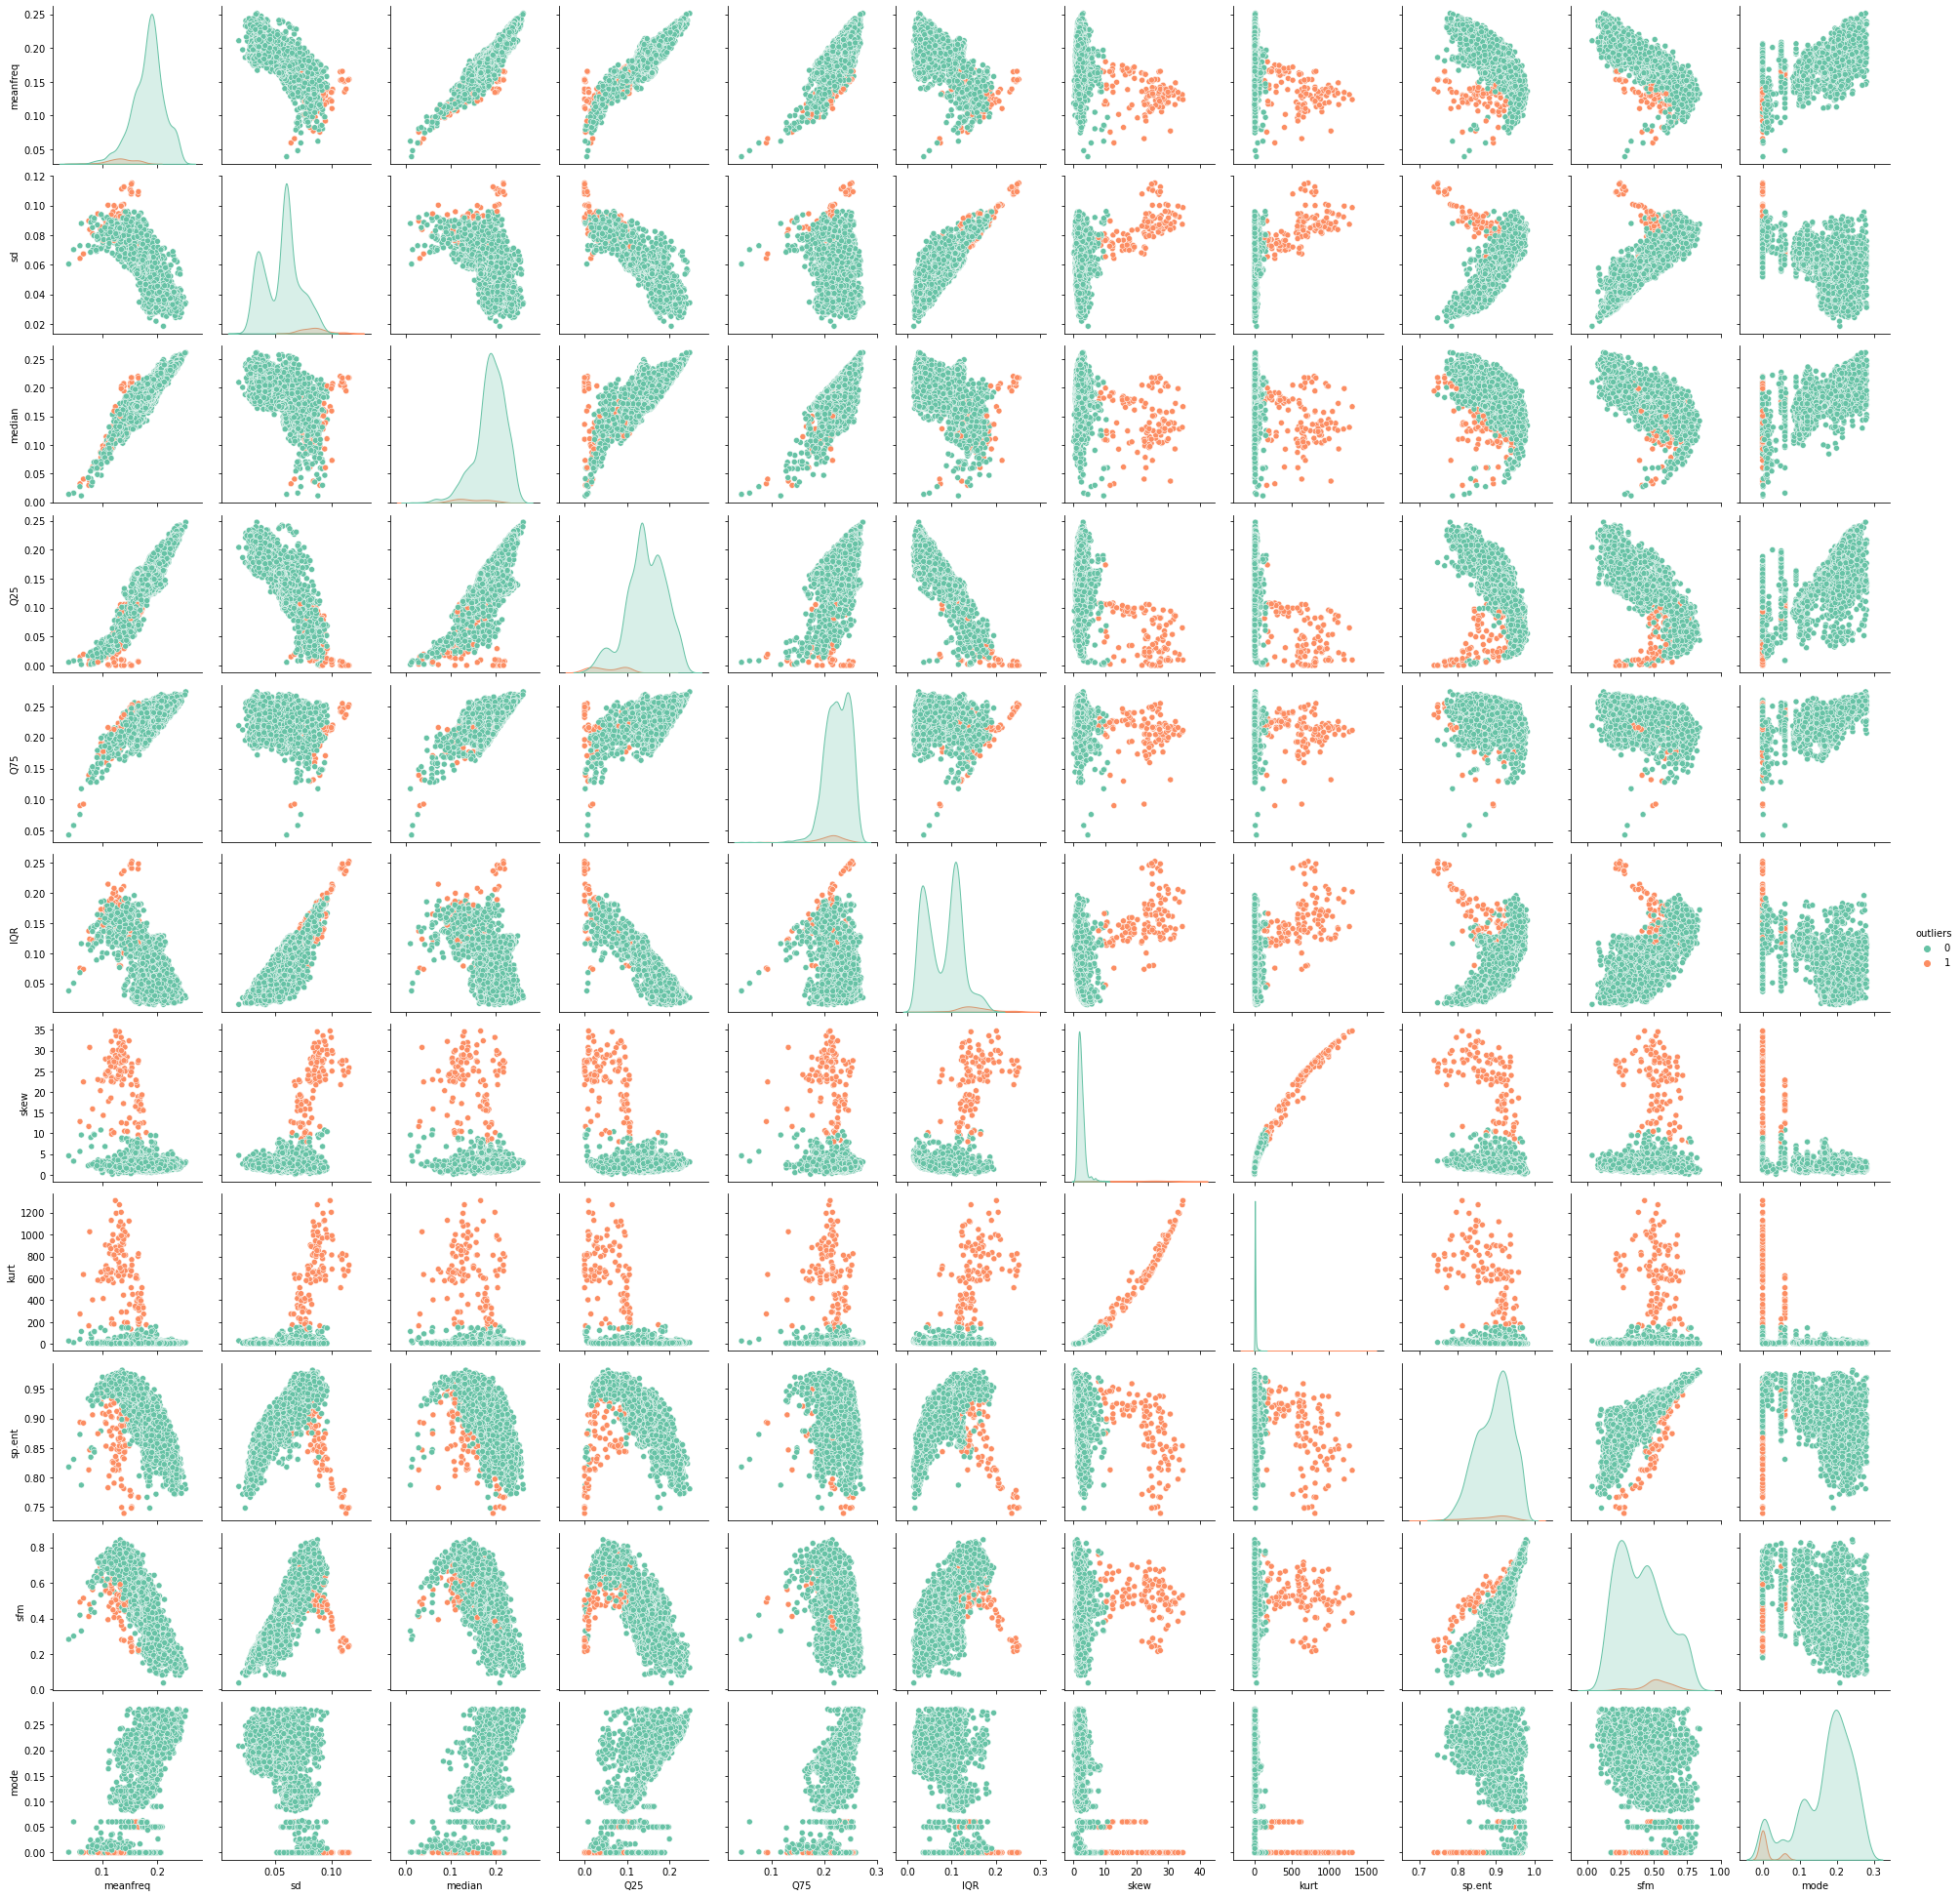

In [6]:
sns.pairplot(DF.iloc[:,list(range(0,11))+ [21]], kind="scatter", hue="outliers", palette="Set2")
plt.show()

W rzeczy samej coś jest na rzeczy. Obiekty pokolorowane zielonym odcieniem odstają w niektórych rozkładach dwu wymiarowych od reszty. Będziemy później dalej testowali przyadtność wyniku tego algorytmu.

### PCA

Zajmiemy się na tym etapie metodą redukcji wymiarów PCA. Będziemy tworzyli nowy układ odniesienia, to jest nową bazę poprzez rzutowanie punktów na nowopowstałe wektory o kierunkach dających największą wariancję. Baza jest ortogonalna. Dzięki temu będziemy mogli otrzymać o wiele mniej zmiennych, które będą tłumaczyły praktycznie całą zmienność chmury punktów w zbiorze. Wadą tej metody jest jej brak uwzględnienia inofrmacji o zmiennej celu i jej powiązaniu ze zmiennymi dostępnymi w zbiorze.

Zauważmy, że przed poszukiwaniem nowej ortogonalnej bazy wystandaryzujemy zmienne.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
DF_standard = StandardScaler().fit_transform(DF.iloc[:,0:20])
pca=PCA(n_components=12)
principalComponents = pca.fit_transform(DF_standard)
principalDF = pd.DataFrame(data = principalComponents)
principalDF.head()

0         1         2         3         4         5         6   \
0  8.208516  2.164488  1.959784  5.452417  0.930851 -1.202176 -1.239370   
1  8.671892  3.854627  4.107208  5.079575  0.411480 -0.120161 -0.880189   
2  9.111169  4.519140  7.528252  3.464543 -0.049165  1.219385 -0.268173   
3  4.109261 -0.562341 -1.253138 -0.667666  0.003349 -0.965539 -0.348339   
4  4.057255 -2.272709 -0.576060  0.962292 -0.183624 -0.493363  0.411477   

         7         8         9         10        11  
0 -1.555728 -1.815147 -1.125035  0.312786 -0.334114  
1 -0.899986 -0.390545 -1.805025 -0.656863 -0.143639  
2 -0.187280 -0.457554 -2.178655 -0.419932  0.125988  
3  0.193231 -0.575210 -0.103054 -0.632156  0.120550  
4  0.250032 -0.109875 -0.208719 -0.305176  0.301849

Powyżej możemy znaleźć 12 pierwszych składowych głównych. Poniżej widać, że 12 z tych składowych wyjaśnia 98.5% zmienności.

In [9]:
sum(pca.explained_variance_ratio_)

0.9850747468784596

In [10]:
pca.explained_variance_ratio_

array([0.45216391, 0.11870609, 0.10909939, 0.07619763, 0.05293938,
       0.04614966, 0.03204482, 0.02898394, 0.02451726, 0.01875518,
       0.01655906, 0.00895843])

In [11]:
sum(pca.explained_variance_ratio_[0:8]) 

0.9162848246855868

Pierwsze 5 składowych wyjaśnia 85% a pierwsze 7 składowych wyjaśnia 92% zmienności. Z doświadczenia można stwierdzić, że to oznacza, że chmura punktów rozkłada się wielu kierunkach w tych wielu wymiarach, bo potrzeba wileu składowych, żeby wytłumaczyć znaczną część wariancji. Zobaczmy czy kompozycja starych zmiennych z kórej skądają się nowe kierunki daje nam jakąś informację.

In [12]:
# Pierwsze trzy kierunki na które punkty były rzutowane.
print(abs(pca.components_[0:3] ))

[[0.31336136 0.27977246 0.27930171 0.30339858 0.18852307 0.24104888
  0.13079792 0.13187105 0.22261647 0.27442864 0.24312987 0.31336136
  0.18770729 0.1581461  0.11054344 0.22603264 0.08893811 0.22917517
  0.22764859 0.08568381]
 [0.03471729 0.20271864 0.00794909 0.1557747  0.18819445 0.28122932
  0.30577621 0.24836735 0.3567777  0.23211293 0.11207328 0.03471729
  0.12854896 0.06307889 0.25000824 0.26905746 0.3048306  0.30872837
  0.31430803 0.16223963]
 [0.01592418 0.09018374 0.04297061 0.06559753 0.11679977 0.13917499
  0.5052488  0.52685991 0.20480753 0.10686745 0.0992788  0.01592418
  0.01266936 0.02952507 0.25908938 0.0487647  0.21096824 0.14594167
  0.14978176 0.44422843]]


Ciężko jest wyróżnić jakąś zależność dla kpierwszych trzech kierunków, bo wkład zmiennych, które je tworzą jest mniej więcej proporcjonalny. Zobaczymy na następnym etapie czy PCA było przydatne w konetekście modelowania i jakości klasyfikacji.

### LASSO

Lasso może nam posłużyć do wstępnej selekcji zmiennych. W tej metodzie zmieniamy funkcję kryterialną, którą chcemy optymalizować poprzez dodanie kary w postaci sumy wartości bezwzględnej estymatorów parametrów strukturalnych modelu przemnożonej przez pewien współczynnik - hiperparametr. W naszym przykładzie nakładamy więc ograniczene na sumę wartości bezwzględnych z współczynników stojących przy zmiennych objsasniających w regresji logitowej. Pewne zmienne nam się wyzerują. Tym samym zostanie wykonana selekcja. Tą selekcją będziemy się na tym etapie jeszcze tylko sugerowali.

In [114]:
# Zmienne, które są kombinacjami liniowymi pozostalych zmiennych w zbiorze zostają usunięte. Źródło detekcji : VIF
DF = DF.drop(columns=["IQR","dfrange", "centroid"]) # Pełen zbiór z dodatkiem zmiennej outliers
from sklearn.linear_model import LogisticRegression

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   median       3168 non-null   float64
 1   Q25          3168 non-null   float64
 2   Q75          3168 non-null   float64
 3   kurt         3168 non-null   float64
 4   sp.ent       3168 non-null   float64
 5   mode         3168 non-null   float64
 6   meanfun      3168 non-null   float64
 7   minfun       3168 non-null   float64
 8   maxfun       3168 non-null   float64
 9   meandom      3168 non-null   float64
 10  mindom       3168 non-null   float64
 11  maxdom       3168 non-null   float64
 12  modindx      3168 non-null   float64
 13  label        3168 non-null   object 
 14  gender       3168 non-null   int64  
 15  mode_trans   3168 non-null   float64
 16  mode_trans2  3168 non-null   int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 420.9+ KB


In [115]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   skew      3168 non-null   float64
 6   kurt      3168 non-null   float64
 7   sp.ent    3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  meanfun   3168 non-null   float64
 11  minfun    3168 non-null   float64
 12  maxfun    3168 non-null   float64
 13  meandom   3168 non-null   float64
 14  mindom    3168 non-null   float64
 15  maxdom    3168 non-null   float64
 16  modindx   3168 non-null   float64
 17  label     3168 non-null   object 
 18  outliers  3168 non-null   int64  
dtypes: float64(17), int64(1), object(1)
memory usage: 470.4+ KB


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 3 to 3167
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   median   3047 non-null   float64
 1   Q25      3047 non-null   float64
 2   Q75      3047 non-null   float64
 3   kurt     3047 non-null   float64
 4   sp.ent   3047 non-null   float64
 5   mode     3047 non-null   float64
 6   meanfun  3047 non-null   float64
 7   minfun   3047 non-null   float64
 8   maxfun   3047 non-null   float64
 9   meandom  3047 non-null   float64
 10  mindom   3047 non-null   float64
 11  maxdom   3047 non-null   float64
 12  modindx  3047 non-null   float64
 13  label    3047 non-null   object 
dtypes: float64(13), object(1)
memory usage: 357.1+ KB


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   median       3168 non-null   float64
 1   Q25          3168 non-null   float64
 2   Q75          3168 non-null   float64
 3   kurt         3168 non-null   float64
 4   sp.ent       3168 non-null   float64
 5   mode         3168 non-null   float64
 6   meanfun      3168 non-null   float64
 7   minfun       3168 non-null   float64
 8   maxfun       3168 non-null   float64
 9   meandom      3168 non-null   float64
 10  mindom       3168 non-null   float64
 11  maxdom       3168 non-null   float64
 12  modindx      3168 non-null   float64
 13  label        3168 non-null   object 
 14  minfun_cat   3168 non-null   int64  
 15  maxdom_cat   3168 non-null   int64  
 16  mindom_cat   3168 non-null   int64  
 17  mode_trans   3168 non-null   float64
 18  mode_trans2  3168 non-null   int64  
 19  mode_k

Z ciekawości lasso wykonamy na każdej z wersji przygotowanych zbiorów

In [140]:
log = LogisticRegression(penalty='l1', solver='liblinear')
Lasso_DF=log.fit(DF.iloc[:,list(range(0,17))+[18]], DF.loc[:,"label"])
Lasso_df=log.fit(df.iloc[:,list(range(0,13))+[16]], df.loc[:,"label"])
Lasso_df1=log.fit(df1.iloc[:,list(range(0,13))], df1.loc[:,"label"])
Lasso_df2=log.fit(df2.iloc[:,list(range(0,13))+[14]+[15]+[16]+[18]+[19]+[20]], df2.loc[:,"label"])

In [130]:
Coefficients_DF=pd.DataFrame({"Variable": DF.columns[list(range(0,17))+[18]], "Coefficient": Lasso_DF.coef_[0]})
Coefficients_DF

Variable  Coefficient
0   meanfreq     0.000000
1         sd     0.000000
2     median     0.000000
3        Q25   -30.739105
4        Q75    33.623319
5       skew    -0.270924
6       kurt     0.004227
7     sp.ent     8.725117
8        sfm    -2.737208
9       mode     1.438481
10   meanfun  -115.904849
11    minfun     0.000000
12    maxfun     0.000000
13   meandom     0.000000
14    mindom    -0.092677
15    maxdom     0.015498
16   modindx    -1.870890
17  outliers     0.365675

In [132]:
Coefficients_df=pd.DataFrame({"Variable": df.columns[list(range(0,13))+[16]], "Coefficient": Lasso_df.coef_[0]})
Coefficients_df

Variable  Coefficient
0        median     0.000000
1           Q25   -24.426072
2           Q75    33.893043
3          kurt    -1.001694
4        sp.ent     3.553884
5          mode     1.199010
6       meanfun  -117.037436
7        minfun     0.000000
8        maxfun     0.000000
9       meandom    -0.701101
10       mindom    -0.033205
11       maxdom     0.994257
12      modindx     0.000000
13  mode_trans2     0.546134

In [135]:
Coefficients_df1=pd.DataFrame({"Variable": df1.columns[list(range(0,13))], "Coefficient": Lasso_df1.coef_[0]})
Coefficients_df1

Variable  Coefficient
0    median     0.000000
1       Q25   -27.371265
2       Q75    35.483141
3      kurt    -1.125133
4    sp.ent     0.000000
5      mode     0.511622
6   meanfun  -118.596540
7    minfun     0.000000
8    maxfun     0.000000
9   meandom    -0.304724
10   mindom    -0.238148
11   maxdom     0.582454
12  modindx    -0.410764

In [142]:
Coefficients_df2=pd.DataFrame({"Variable": df2.columns[list(range(0,13))+[14]+[15]+[16]+[18]+[19]+[20] ], "Coefficient": Lasso_df2.coef_[0]})
Coefficients_df2

Variable  Coefficient
0        median     0.000000
1           Q25    -8.562501
2           Q75    11.870054
3          kurt    -1.441117
4        sp.ent     0.828609
5          mode     0.171316
6       meanfun   -27.468740
7        minfun     1.300230
8        maxfun     0.000000
9       meandom    -1.433079
10       mindom    -0.170932
11       maxdom     0.000000
12      modindx     0.000000
13   minfun_cat     0.602939
14   maxdom_cat     1.847504
15   mindom_cat     0.000000
16  mode_trans2     0.161563
17    mode_kurt    -0.225766
18   mode_kurt2     0.000000

Należy zwrócic uwagę na to jak w różnych zestawieniach różne zmienne się zerują. Nie zawsze zgodnie z naszymi intuicjami wyprowadzanymi na poprzednich etapach. 

Ostatecznie dobór zmiennych i decyzja o usunięciu obserwacji potencjalnie odstających powinna być dokładnie rozważona i powinna brac pod uwagę używany w analizie model. Na następnym etapie dokonamy uporządkowania dotychczasowych wyników w kontekście dobranego modelu, pewnie zbadamy też ich wpływ na ostateczny wynik, potencjalnie będzie to bardzo pouczające i informujące.